In [1]:
## Load Libraries
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load files
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

image_id    label
0  train_1a     rice
1  train_1b    candy
2  train_1c      jam
3  train_1d   coffee
4  train_2a  vinegar

The train data has 25 unique labels


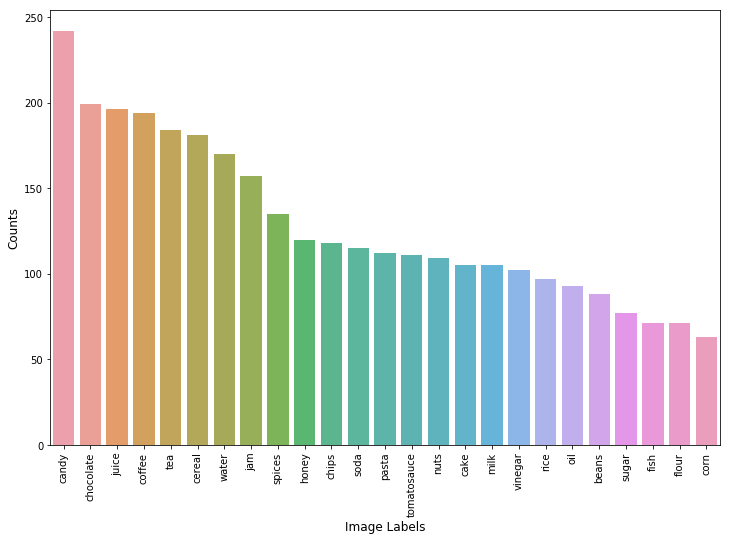

<class 'pandas.core.series.Series'>


In [4]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))
#Labels 
label_counts = train['label'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()
print(type(label_counts))

In [5]:
# set path to read train and test image
TRAIN_PATH = '../data/train_img/'
TEST_PATH = '../data/test_img/'

In [6]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    #Image is loaded as BGR convert it to RGB.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64)) # you can resize to  (128,128) or (256,256)
    return img

In [7]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

100%|██████████| 1732/1732 [00:04<00:00, 430.90it/s]


In [8]:
#Now you have list of images
print(type(train_data))
#Convert them to numpy float arrays in passion(b,h,w,c) and normalize them too.
x_train = np.array(train_data, np.float32) / 255.
x_test = np.array(test_data, np.float32) / 255.
print(x_train.shape, x_test.shape)

<type 'list'>
((3215, 64, 64, 3), (1732, 64, 64, 3))


In [9]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v for v,k in enumerate(set(label_list))}
print(type(Y_train))
categories = len(Y_train)
print('categories',categories)
print(Y_train)
y_train1 =np.array([Y_train[k] for k in label_list])
print(y_train1.shape)

<type 'dict'>
('categories', 25)
{'tea': 0, 'fish': 1, 'honey': 2, 'juice': 3, 'milk': 4, 'nuts': 5, 'sugar': 6, 'jam': 7, 'rice': 8, 'coffee': 9, 'oil': 10, 'flour': 11, 'corn': 12, 'chocolate': 13, 'water': 14, 'cereal': 15, 'pasta': 16, 'chips': 17, 'tomatosauce': 18, 'vinegar': 19, 'candy': 20, 'beans': 21, 'soda': 22, 'cake': 23, 'spices': 24}
(3215,)


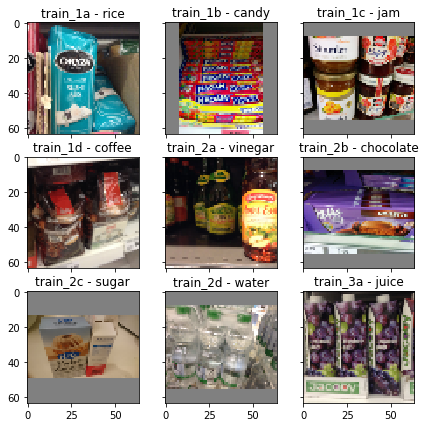

In [10]:


## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break



In [11]:
#convert to one-hot
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [12]:
y_train = one_hot(y_train1,categories)
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))


number of training examples = 3215
number of test examples = 1732
X_train shape: (3215, 64, 64, 3)
Y_train shape: (3215, 25)
X_test shape: (1732, 64, 64, 3)


In [13]:
import tensorflow as tf
from utils import *
#utils contain a simple tensorflow template

In [14]:
#Create Placeholders followed by Tensorflow
#x = tf.placeholder(tf.float32, shape=[None, 64*64], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.placeholder(tf.float32, shape=[None, 64, 64, 3], name='X')

# Placeholder variable for the true labels associated with the images
y_actual = tf.placeholder(tf.float32, shape=[None, 25], name='y_actual')
y_actual_cls = tf.argmax(y_actual, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [15]:
#Graph Started
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=3, filter_size=3, num_filters=32, name ="conv1")
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")
layer_relu1 = new_relu_layer(layer_pool1, name="relu1")

layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=32, filter_size=3, num_filters=64, name= "conv2")
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

layer_conv3, weights_conv3 = new_conv_layer(input=layer_relu2, num_input_channels=64, filter_size=3, num_filters=128, name= "conv3")
layer_pool3 = new_pool_layer(layer_conv3, name="pool3")
layer_relu3 = new_relu_layer(layer_pool3, name="relu3")

layer_conv4, weights_conv4 = new_conv_layer(input=layer_relu3, num_input_channels=128, filter_size=3, num_filters=256, name= "conv4")
layer_pool4 = new_pool_layer(layer_conv4, name="pool4")
layer_relu4 = new_relu_layer(layer_pool4, name="relu4")

num_features = layer_relu4.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu4, [-1, num_features])
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")
layer_relu5 = new_relu_layer(layer_fc1, name="relu5")
layer_fc2 = new_fc_layer(input=layer_relu5, num_inputs=128, num_outputs=25, name="fc2")


In [16]:
# Now, we have 25 values in the last computed layer
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

In [17]:
# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_actual)#logits = layer_fc2
    cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [18]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [19]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_actual_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# Few
num_epochs = 1000
batch_size = 5

In [21]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")
# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [ ]:
import time
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    for epoch in range(num_epochs):
        start_time = time.time()
        train_accuracy = 0
        train_cost = 0
        beg, end = 0, batch_size
        for batch in range(0, x_train.shape[0]/batch_size):
             x_batch = x_train[beg:end]
             y_actual_batch = y_train[beg:end]
             beg = end
             end = end+batch_size
             #print x_batch.shape, y_true_batch.shape
             # Put the batch into a dict with the proper names for placeholder variables
             feed_dict_train = {x_image: x_batch, y_actual: y_actual_batch}
             # Run the optimizer using this batch of training data.
             sess.run(optimizer, feed_dict=feed_dict_train)
             # Calculate the accuracy on the batch of training data
             train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
             train_cost += sess.run(cost, feed_dict=feed_dict_train)
            
        train_accuracy /= int(x_train.shape[0])/batch_size
        train_cost /= int(x_train.shape[0])/batch_size
        # Generate summary and validate the model on the entire validation set
        summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x_image:x_train[0:20], y_actual:y_train[0:20]})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        
        
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))
        print ("\t- Training Cost:\t{}".format(train_cost))
        
        predictions = sess.run(y_pred_cls,feed_dict={x_image: x_test})
#         predictions = np.argmax(predictions, axis= 1)
        y_maps = dict()
        y_maps = {v:k for k, v in Y_train.items()}
        pred_labels = [y_maps[k] for k in predictions]
        sub1 = pd.DataFrame({'image_id':test.image_id, 'label':pred_labels})
        sub1.to_csv('./results/sub_'+str(epoch)+'.csv', index=False)
        print('Written CSV!')
        

Epoch 1 completed : Time usage 49 seconds
	Accuracy:
	- Training Accuracy:	0.0783825828629
	- Validation Accuracy:	0.20000000298
	- Training Cost:	3.1456689245
Written CSV!
Epoch 2 completed : Time usage 59 seconds
	Accuracy:
	- Training Accuracy:	0.166407467881
	- Validation Accuracy:	0.25
	- Training Cost:	2.87893274172
Written CSV!
Epoch 3 completed : Time usage 66 seconds
	Accuracy:
	- Training Accuracy:	0.230793161697
	- Validation Accuracy:	0.40000000596
	- Training Cost:	2.63614391743
Written CSV!
Epoch 4 completed : Time usage 66 seconds
	Accuracy:
	- Training Accuracy:	0.272472789485
	- Validation Accuracy:	0.40000000596
	- Training Cost:	2.46782395258
Written CSV!
Epoch 5 completed : Time usage 69 seconds
	Accuracy:
	- Training Accuracy:	0.32192846741
	- Validation Accuracy:	0.40000000596
	- Training Cost:	2.3047724343
Written CSV!
Epoch 6 completed : Time usage 71 seconds
	Accuracy:
	- Training Accuracy:	0.367340599235
	- Validation Accuracy:	0.550000011921
	- Training Cost: